# Import Libraries

In [7]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import re
import numpy as np

# Load Dataset

In [30]:
# Load dataset
df = pd.read_csv('data_clean_raw_reviews.csv')

In [31]:
# Preview data
df.head()

,product,img_url,customer_say,review,price,rating,brand,gender
0,Adidas Fortarun 2.0 Cloudfoam Lace,https://m.media-amazon.com/images/I/61BuM-r7P0...,Customers find these running shoes to be well-...,{'review': 'Amazing quality and my four year o...,43.0,4.5,Adidas,Unisex
1,Adidas Men's Lightblaze,https://m.media-amazon.com/images/I/8195tyJbBv...,No summary available.,"{'review': 'solid daily use shoe', 'rating': '...",27.0,5.0,Adidas,Men
2,Adidas Men's Lightshift,https://m.media-amazon.com/images/I/7114rduvMK...,Customers find these walking shoes comfortable...,{'review': 'Fits great. Comfy. Quality and app...,40.0,4.8,Adidas,Men
3,Adidas Men's Run Falcon 5,https://m.media-amazon.com/images/I/71eXwqTa5B...,Customers find these running shoes comfortable...,"{'review': ""Very good shoes, 100% recommended....",56.0,4.5,Adidas,Men
4,Adidas Men's X_PLR Path,https://m.media-amazon.com/images/I/71wGLUKuCJ...,"Customers find these shoes comfortable, well-f...",{'review': 'Can’t go wrong with adidas. Bought...,60.0,4.7,Adidas,Men


# EDA

### 1. Distribusi Brand

Pie chart untuk distribusi jumlah produk per brand

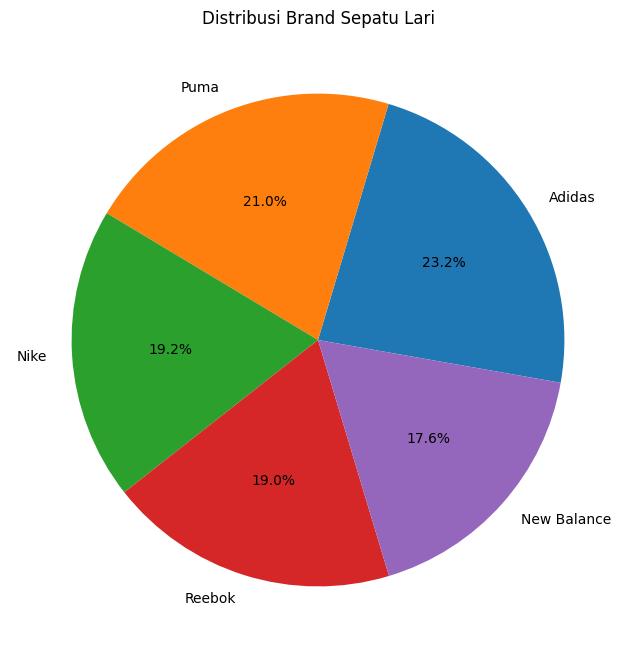

In [32]:
brand_counts = df['brand'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=350) 
plt.title('Distribusi Brand Sepatu Lari') 
plt.show()

Insight: Puma dan Adidas mendominasi (sekitar 21-23% data), artinya paling banyak pilihan sepatu lari di Amazon. New Balance dan Reebok lebih sedikit (17.6-19%), tapi New Puma stabil di 19.2%. Ini tunjukkan pasar sepatu lari didominasi brand besar, tapi ada variasi untuk pemula yang cari opsi murah.

### 2. Rata-rata Harga per Brand

Barplot untuk rata-rata harga per brand

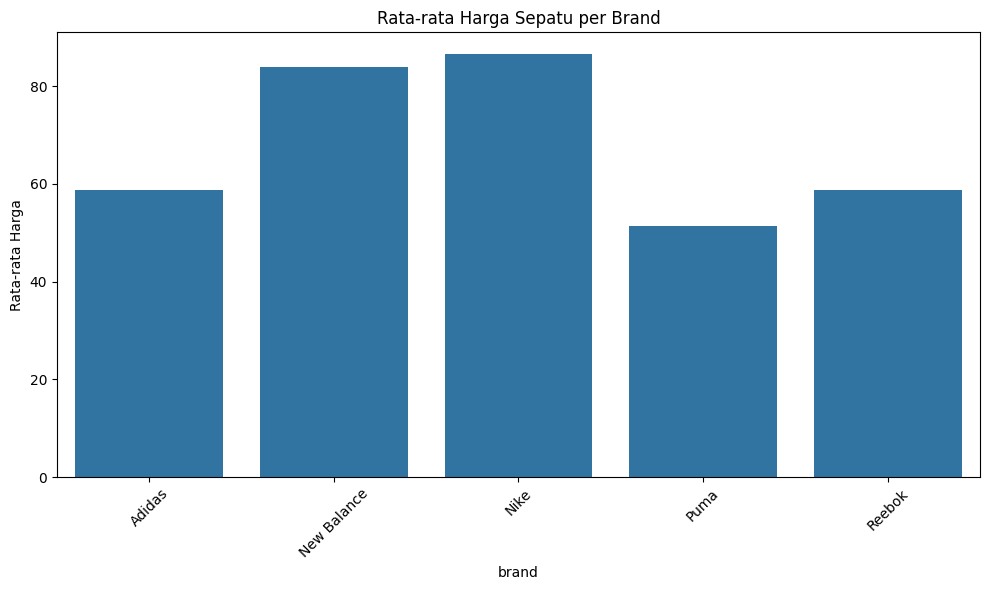

In [33]:
rerata_harga = df.groupby('brand')['price'].mean().round(2)

plt.figure(figsize=(10, 6)) 
sns.barplot(x=rerata_harga.index, y=rerata_harga.values) 
plt.title('Rata-rata Harga Sepatu per Brand') 
plt.xlabel('brand') 
plt.ylabel('Rata-rata Harga') 
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

Insight: Puma paling murah (rata-rata $50), cocok untuk pemula. Nike dan New Balance lebih mahal (sekitar $80), tapi Adidas dan Rebook di tengah ($50-60). Ini berarti sepatu bagus tidak selalu mahal – ada opsi terjangkau dengan kualitas mirip.

### 3. Rata-rata Rating per Brand

Barplot untuk rata-rata rating per brand

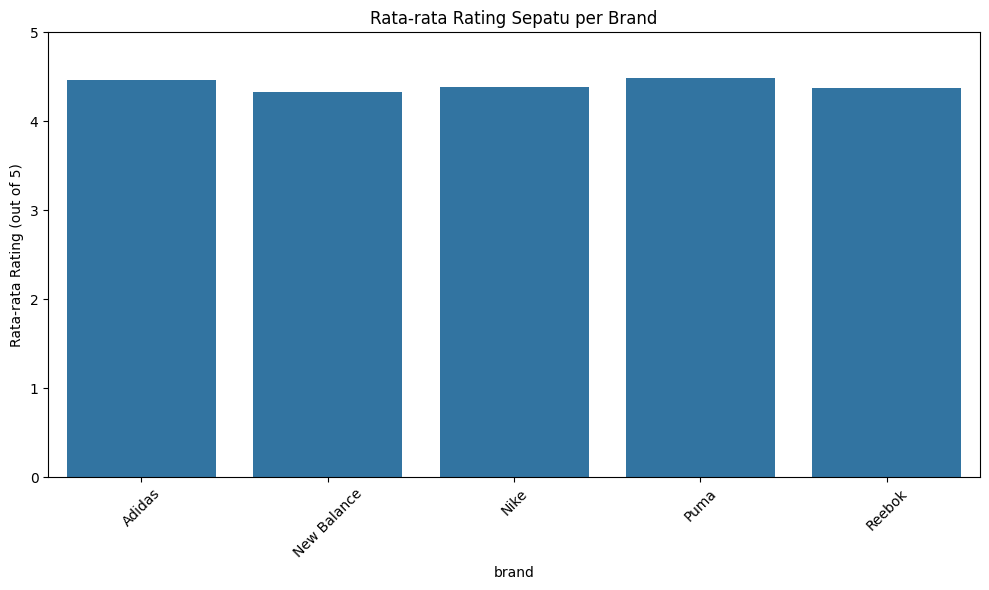

In [34]:
rerata_rating = df.groupby('brand')['rating'].mean().round(2)

plt.figure(figsize=(10, 6)) 
sns.barplot(x=rerata_rating.index, y=rerata_rating.values)
plt.title('Rata-rata Rating Sepatu per Brand') 
plt.xlabel('brand') 
plt.ylabel('Rata-rata Rating (out of 5)') 
plt.xticks(rotation=45) 
plt.ylim(0, 5) 
plt.tight_layout() 
plt.show()

Insight : Semua brand memiliki rata-rata rating yang cukup bagus, dimana semuanya mendapat rating di atas 4 (dari 5), namun, brand Puma dan Adidas memiliki rating yang tertinggi, dan brand-brand yang lain lebih sedikit namun tidak beda jauh.

### 4. Korelasi antara Price dan Rating

Heatmap korelasi untuk melihat hubungan harga dan rating

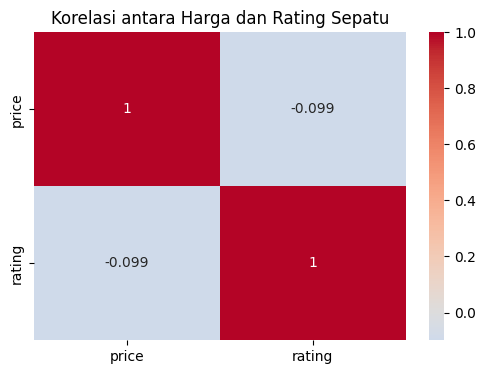

In [35]:
numeric_cols = df[['price', 'rating']].dropna() 
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(6, 4)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Korelasi antara Harga dan Rating Sepatu') 
plt.show()

Insight : Ada hubungan lemah, dimana sepatu yang cenderung mahal memiliki rating lebih tinggi , tapi banyak sepatu yang tergolong murah juga mendapat rating bagus. Artinya, tidak perlu beli mahal untuk dapat sepatu yang nyaman, karena kualitas lebih mempengaruhi kepuasan pembeli.

### 5. Word Cloud dari Review

Fungsi untuk membuat Word Cloud dari review

In [21]:
def generate_wordcloud(text_data, title):
	""" Fungsi untuk membuat Word Cloud dari teks review. """
	text = ' '.join(text_data.dropna())
	text = re.sub(r'[^\w\s]', '', text.lower()) # Cleaning sederhana

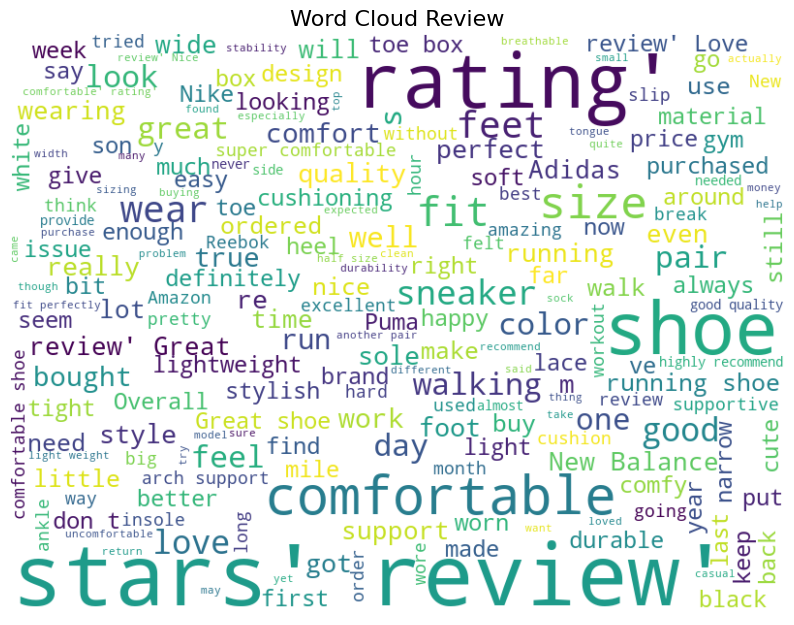

In [36]:
text = ' '.join(df['review'].dropna())

wordcloud = WordCloud(
    width=800,
    height=600,
    background_color='white',
    random_state=42,
    min_font_size=10
).generate(text)

title = "Word Cloud Review"
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(title, fontsize=16)
plt.show()

Insight : Kata-kata besar seperti "comfortable", "good", "fit", dan "perfect" menonjol, yang berarti bahwa review dari customer secara keseluruhan cenderung positif.

### Word Cloud untuk semua review

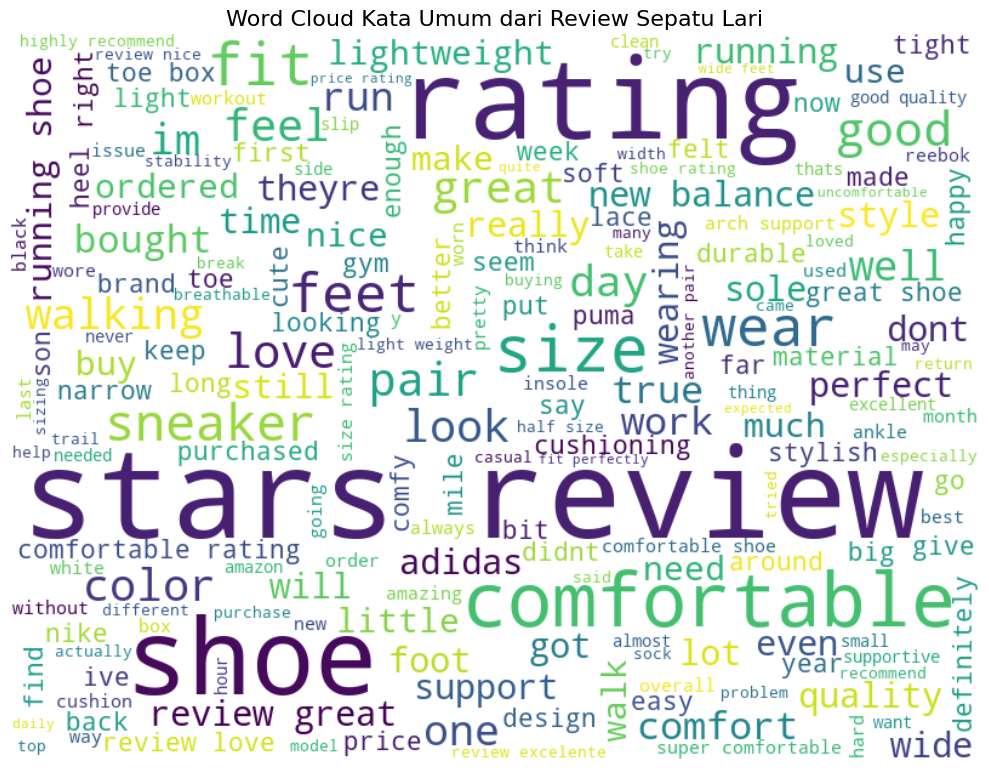

In [38]:
generate_wordcloud(df['review'], 'Word Cloud Kata Umum dari Review Sepatu Lari')

### 6. Distribusi Rating Keseluruhan

Histogram untuk melihat sebaran rating sepatu dari semua brand

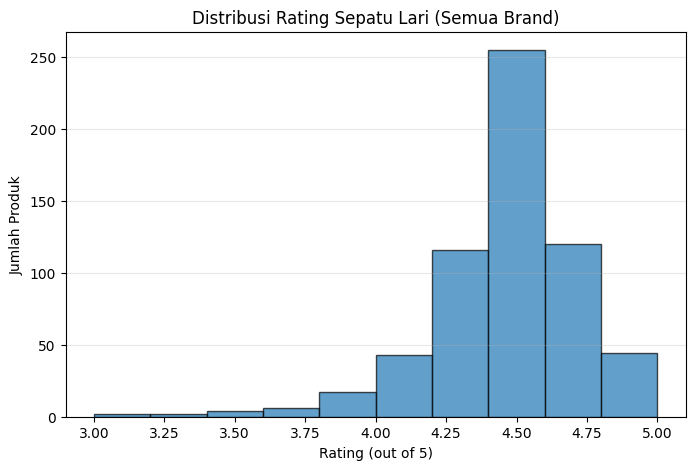

In [39]:
plt.figure(figsize=(8, 5))
plt.hist(df['rating'].dropna(), bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribusi Rating Sepatu Lari (Semua Brand)')
plt.xlabel('Rating (out of 5)')
plt.ylabel('Jumlah Produk')
plt.grid(axis='y', alpha=0.3)
plt.show()

Insight : Terlihat bahwa banyak sepatu (lebih dari 300) memiliki rating 4.0-5.0, dan hanya sedikit yang memiliki rating di bawah 3.5. Ini berarti pasar sepatu lari yang diambil dari Amazon aman atau jarang jelek, membuat pembeli lebih yakin untuk membelinya.